In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

## 1
Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод.

In [3]:
from sklearn.linear_model import Ridge


In [4]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [5]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [6]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [7]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [8]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [9]:
def gradient_descent_reg_l2(X, y, iterations, reg, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')

    return W

In [11]:
n = 20

coeffs = np.zeros((n, X.shape[1])) 
lambdas = np.logspace(-3, 2, n)

for i, val in enumerate(lambdas):
    coeffs[i, :] = gradient_descent_reg_l2(X_st, y, iterations=1000, reg=val, eta=1e-2)
# Находим серию коэффициентов при разных значениях лямбда
coeffs

Final MSE: 24.938266566454967
Final MSE: 24.96209719520878
Final MSE: 24.96446661546361
Final MSE: 24.999360336916332
Final MSE: 25.1326705935648
Final MSE: 25.310371881442293
Final MSE: 26.13639497354232
Final MSE: 28.798751460385553
Final MSE: 36.9402853896665
Final MSE: 60.99036668666147
Final MSE: 126.45354485641842
Final MSE: 282.87244711182916
Final MSE: 592.5325538414087
Final MSE: 1075.2702682989868
Final MSE: 1655.90502801499
Final MSE: 2205.386787306681
Final MSE: 2634.587676510136
Final MSE: 2926.890525642231
Final MSE: 3108.793661370587
Final MSE: 3215.845108956103


array([[56.47176402,  6.20734319,  0.07644505,  6.21767724],
       [56.44826561,  6.17908095,  0.20216015,  6.11407557],
       [56.40524422,  6.17474165,  0.18229717,  6.1349448 ],
       [56.32655686,  6.15333064,  0.24929766,  6.0802631 ],
       [56.18289302,  6.09443564,  0.49030939,  5.8778816 ],
       [55.92145388,  6.10506295,  0.26395062,  6.07732993],
       [55.44850493,  6.01360242,  0.45203219,  5.93210878],
       [54.60205228,  5.84050186,  0.84823148,  5.61917784],
       [53.11579362,  5.59957714,  1.27096043,  5.28545945],
       [50.59160508,  5.25005438,  1.79774062,  4.84697956],
       [46.53780861,  4.79229211,  2.30710938,  4.35835285],
       [40.57800356,  4.24958816,  2.62150872,  3.88182499],
       [32.86364602,  3.63329351,  2.66325342,  3.38185372],
       [24.37103903,  2.95322844,  2.42383775,  2.81241291],
       [16.53756091,  2.24203257,  1.97376672,  2.17660247],
       [10.406433  ,  1.57163634,  1.44224968,  1.54632518],
       [ 6.19593383,  1.

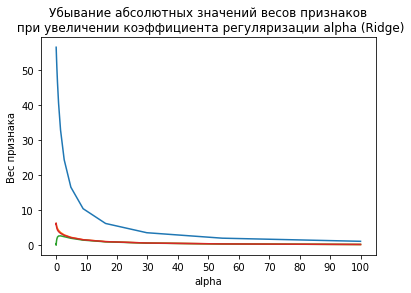

In [12]:
for i in range(X_st.shape[1]):
    plt.plot(lambdas, coeffs[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('alpha')
plt.ylabel('Вес признака');

## 2
Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [14]:
def gradient_descent_reg_l1(X, y, iterations, reg, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')

    return W

In [15]:
n = 20

coeffs2 = np.zeros((n, X.shape[1])) 
lambdas = np.logspace(-3, 2, n)

for i, val in enumerate(lambdas):
    coeffs2[i, :] = gradient_descent_reg_l1(X_st, y, iterations=1000, reg=val, eta=1e-2)
# Находим серию коэффициентов при разных значениях лямбда
coeffs2

Final MSE: 24.957472613923464
Final MSE: 24.952433341993572
Final MSE: 25.003700109756473
Final MSE: 24.97757311686096
Final MSE: 24.964259145041726
Final MSE: 24.93594896823272
Final MSE: 24.95570082555816
Final MSE: 24.973312864107896
Final MSE: 24.95170821730433
Final MSE: 24.986029487093237
Final MSE: 25.077260709237052
Final MSE: 25.28665084629724
Final MSE: 26.045163470380288
Final MSE: 28.725267226661053
Final MSE: 37.67385895103128
Final MSE: 67.54726626616717
Final MSE: 168.74814951565517
Final MSE: 362.01246021673137
Final MSE: 914.9136787092439
Final MSE: 2638.990593032403


array([[ 5.64994999e+01,  6.18453116e+00,  1.92889953e-01,
         6.12209271e+00],
       [ 5.64990834e+01,  6.19140344e+00,  1.65500359e-01,
         6.14308130e+00],
       [ 5.64983200e+01,  6.14578682e+00,  3.93629493e-01,
         5.95235130e+00],
       [ 5.64969207e+01,  6.16450327e+00,  2.87389882e-01,
         6.04157490e+00],
       [ 5.64943557e+01,  6.16997938e+00,  2.26242006e-01,
         6.09596285e+00],
       [ 5.64896542e+01,  6.20408050e+00,  6.22400743e-02,
         6.22582781e+00],
       [ 5.64810365e+01,  6.17574305e+00,  1.73555998e-01,
         6.12912202e+00],
       [ 5.64652403e+01,  6.15068358e+00,  2.46315773e-01,
         6.06051604e+00],
       [ 5.64362862e+01,  6.16964937e+00,  8.89017974e-02,
         6.17032472e+00],
       [ 5.63832138e+01,  6.12876817e+00,  1.46293385e-01,
         6.08987636e+00],
       [ 5.62859333e+01,  6.05908543e+00,  2.15231950e-01,
         5.97449643e+00],
       [ 5.61076199e+01,  5.99734159e+00,  3.47140531e-02,
      

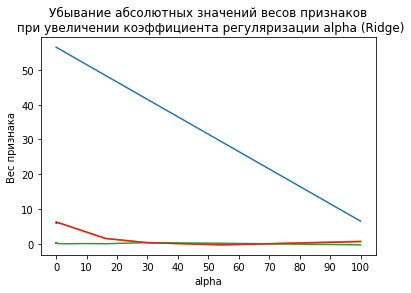

In [16]:
for i in range(X_st.shape[1]):
    plt.plot(lambdas, coeffs2[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('alpha')
plt.ylabel('Вес признака');

## 3  
Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?